Copyright 2020 DeepMind Technologies Limited

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

     https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

## Clone repo and import dependencies

In [ ]:
import objaverse
import multiprocessing
import random
import trimesh
import numpy as np
processes = multiprocessing.cpu_count()
uids = objaverse.load_uids()
annotations = objaverse.load_annotations()
# random_object_uids = random.sample(uids, 4)
# steak_uids = ['b47dc21973344b779445f4e1511a8042', 'a6fa0df7d7ce4022b7202a9334a59763', '622fc5f8e60442439ebb0d8338108385', '3fe13164a6074993a8670a22d8feec41', '44c81c84860844fbbebbdcc558548420']
# plate_uids = ['ff6c2a731571458f883ae44d33522bb8', '7c265f6c42ef40b8b3e9c42560c28a97', 'd908887c14a54382a2384db2d50ab9d2', 'e91f046f7d5c4dbda1571259b0460782', 'e447aa2a406e4f738fc381972665e19c']
# fork_uids = ['f77e41ee56b04bfd960b161131837bac', 'd9f56c6b4938496e94ca04ed61743c64', 'b40f7ac290d241aba9027c6cabe222c1', '7ade6b2a36174ce3a03308ba8531f33e', '34c052f5182d40d9b204c0dc83d1f44b']
# knife_uids = ['f44ca5eb44fe444d8ad1890cd5cfccf0', 'b71cea598155484cbca74c09cd4d55bb', 'aa5b9a4041d245e894473ce681a94d6f', '484ffa5d2513452791e5c7dcffeba9c0', 'fb57c936ffbe43e3a8ed93ae4597c36e']
# random_object_uids = [*random.sample(steak_uids, 1), *random.sample(plate_uids, 1), *random.sample(fork_uids, 1), *random.sample(knife_uids, 1)]

# steak_uids = ['a6fa0df7d7ce4022b7202a9334a59763',]
# plate_uids = [ 'ff6c2a731571458f883ae44d33522bb8',]
# fork_uids = [ 'b40f7ac290d241aba9027c6cabe222c1', ]
# knife_uids = ['f44ca5eb44fe444d8ad1890cd5cfccf0', ]
# random_object_uids = [*random.sample(steak_uids, 1), *random.sample(plate_uids, 1), *random.sample(fork_uids, 1), *random.sample(knife_uids, 1)]
# print(random_object_uids)
# objects = objaverse.load_objects(
#     uids=random_object_uids,
#     download_processes=processes)



In [ ]:
#OBJECT LOAD PARAMETERS

max_classes = 5
max_objects_per_class = 5
max_faceCount = 3000
min_faceCount = 500
min_vertexCount = 200

In [ ]:

class_dict = {}
for uid, annotation in annotations.items():
    if (annotation["faceCount"] <= max_faceCount and annotation["faceCount"] >= min_faceCount and annotation["vertexCount"] >= min_vertexCount):
        for tag in annotation["tags"]:
            newList = class_dict[tag['name']] if tag['name'] in class_dict else []
            newList.append(uid)
            class_dict[tag['name']] = newList

In [ ]:
tags_to_remove = ['lowpoly', 'substancepainter', 'substance', 'low-poly', 'blender', '3d', '3dmodel', '3dmodeling', 'poly', 'video-game', 'game', 'low', 'maya', 'gameasset', '3dsmax', 'google', 'asset', 'medievalfantasyassets', 'voxel', 'unity', 'blender3d', 'medieval', 'gameready', 'stylized', 'pbr', 'design', 'low-poly-model', 'model', 'sketchup', 'handpainted', 'downloadable', 'wooden', 'unity3d', 'metal', 'props', 'game-ready', 'lowpolymodel', 'art', 'texture', '3dsmaxpublisher','gameart','simple','pointcloud','game-asset','freemodel', 'low-poly-blender', 'animation', 'obj', 'zbrush', 'blender-3d', 'fbx','scifi','substance-painter','sample','photogrammetry','unreal','free3dmodel','lidar','games', 'video-games', 'free', 'old', 'download', 'home','staircon', 'assets', 'videogame', 'gameassets', 'gameasset','cute', 'textured','everypoint', 'animated','sweethome3d','cinema4d','pixelart','photoshop','retro','red', 'vr', 'realistic', '3dscan', 'isometric', 'rigged', 'gamedev', 'pixel', 'gaming', 'pixel-art', 'b3d', 'blue','stairs','stair','staircases','staircase']

for tag in tags_to_remove:
    if tag in class_dict:
        del class_dict[tag]

In [ ]:
random.seed(42)
classes = []
object_uids = []
for i in range(max_classes):
    max_class = max(class_dict, key=lambda k: len(class_dict[k]))
    print(max_class, len(class_dict[max_class]))
    classes.append(max_class)
    object_uids.append(class_dict[max_class][:max_objects_per_class])
    del class_dict[max_class]


In [ ]:
objects = []
for i, class_name in enumerate(classes):
    print(class_name)
    objects.append(objaverse.load_objects(
        uids=object_uids[i],
        download_processes=processes))

In [ ]:
# meshes = []
# for i,_ in enumerate(classes):
#     for uid, path in objects[i].items():
#         scene = trimesh.load(path)
#         geometries = list(scene.geometry.values())
#         geometry = geometries[0]
#         meshes.append(geometry)

In [ ]:
from tqdm import tqdm

In [ ]:
~/Courses/ML43D/deepmind-research/polygen/data/ShapeNetCore.v2/04379243

In [1]:

import trimesh
import os
import numpy as np
import tensorflow.compat.v1 as tf
tf.logging.set_verbosity(tf.logging.ERROR)  # Hide TF deprecation messages
import matplotlib.pyplot as plt

import modules_knowledge_distill as modules
import data_utils2 as data_utils

/home/deria/anaconda3/envs/AnkurTF/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/deria/anaconda3/envs/AnkurTF/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/deria/anaconda3/envs/AnkurTF/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/deria/anaconda3/envs/AnkurTF/lib/python3

## Prepare a synthetic dataset
We prepare a dataset of meshes using four simple geometric primitives.

The important function here is `data_utils.load_process_mesh`, which loads the raw `.obj` file, normalizes and centers the meshes, and applies quantization to the vertex positions. The mesh faces are flattened and treated as a long sequence, with a new-face token (`=1`) separating the faces. For each of the four synthetic meshes, we associate a unique class label, so we can train class-conditional models.

After processing the raw mesh data into numpy arrays, we create a `tf.data.Dataset` that we can use to feed data to our models. 

In [2]:
# def get_shapenet_obj_paths(shapenet_dir):
#     obj_paths = []
#     for root, dirs, files in os.walk(shapenet_dir):
#         for file in files:
#             if file.endswith('.obj'):
#                 obj_paths.append(os.path.join(root, file))
#     return obj_paths

# # Set the directory where you have extracted the ShapeNet dataset
# shapenet_directory = 'data/ShapeNetCore.v2'
# obj_paths = get_shapenet_obj_paths(shapenet_directory)

# # Print the paths
# for path in obj_paths:
#     print(path)

In [3]:
# print(classes[i])

In [4]:
# print(list(objects[i].items())[0][1])

In [5]:
classes = ['table',]
objects = [[
    ('table1','data/ShapeNetCore.v2/04379243/1a80520ab14439ef79b3e1be3524f72f/models/model_normalized.obj'),
            ('table2','data/ShapeNetCore.v2/04379243/1a9036f081dd51683a9bf8c718fc345e/models/model_normalized.obj'),
        ('table3','data/ShapeNetCore.v2/04379243/1a3cf7fca32910c4107b7172b5e0318e/models/model_normalized.obj'),
            ('table4','data/ShapeNetCore.v2/04379243/1a05bd57d0ea709e7d3ba54b9bdaa55c/models/model_normalized.obj'),
            ]]
#OBJECT LOAD PARAMETERS

max_classes = 1
max_objects_per_class = 4
max_faceCount = 3000
min_faceCount = 500
min_vertexCount = 200

In [6]:
ex_list = []
max_verts  = 0
max_faces = 0
for i, class_name in enumerate(classes):
  for k, (uid,path) in enumerate(objects[i]):
    print(path)
    mesh_dict = data_utils.load_process_mesh(os.path.join(path))
    if(mesh_dict['vertices'].shape[0] > max_verts):
      max_verts = mesh_dict['vertices'].shape[0]
    if(mesh_dict['faces'].shape[0] > max_faces):
      max_faces = mesh_dict['faces'].shape[0]
    mesh_dict['class_label'] = i
    ex_list.append(mesh_dict)
    print(mesh_dict['vertices'].shape)
synthetic_dataset = tf.data.Dataset.from_generator(
    lambda: ex_list, 
    output_types={
        'vertices': tf.int32, 'faces': tf.int32, 'class_label': tf.int32},
    output_shapes={
        'vertices': tf.TensorShape([None, 3]), 'faces': tf.TensorShape([None]), 
        'class_label': tf.TensorShape(())}
    )
ex = synthetic_dataset.make_one_shot_iterator().get_next()

# Inspect the first mesh
with tf.Session() as sess:
  ex_np = sess.run(ex)
print(ex_np)



data/ShapeNetCore.v2/04379243/1a80520ab14439ef79b3e1be3524f72f/models/model_normalized.obj
(284, 3)
data/ShapeNetCore.v2/04379243/1a9036f081dd51683a9bf8c718fc345e/models/model_normalized.obj
(202, 3)
data/ShapeNetCore.v2/04379243/1a3cf7fca32910c4107b7172b5e0318e/models/model_normalized.obj
(288, 3)
data/ShapeNetCore.v2/04379243/1a05bd57d0ea709e7d3ba54b9bdaa55c/models/model_normalized.obj
(249, 3)
{'vertices': array([[122,  27,  80],
       [132,  27,  80],
       [122,  37,  80],
       [132,  37,  80],
       [ 78, 125,  80],
       [ 88, 125,  80],
       [166, 125,  80],
       [176, 125,  80],
       [ 78, 134,  80],
       [ 88, 134,  80],
       [166, 134,  80],
       [176, 134,  80],
       [122, 217,  80],
       [132, 217,  80],
       [122, 227,  80],
       [132, 227,  80],
       [122,  37, 109],
       [132,  37, 109],
       [117,  43, 109],
       [137,  43, 109],
       [112,  49, 109],
       [143,  49, 109],
       [107,  56, 109],
       [147,  56, 109],
       [103

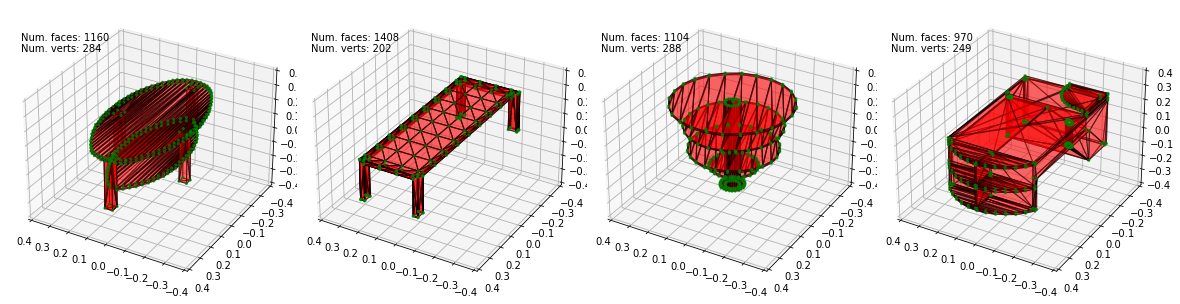

In [7]:
# Plot the meshes
mesh_list = []
with tf.Session() as sess:
  for i in range(max_classes*max_objects_per_class):
    ex_np = sess.run(ex)
    mesh_list.append(
        {'vertices': data_utils.dequantize_verts(ex_np['vertices'],n_bits=8), 
         'faces': data_utils.unflatten_faces(ex_np['faces'])})
data_utils.plot_meshes(mesh_list, ax_lims=0.4)

In [43]:
vertex_module_config2=dict(
    decoder_config=dict(
        hidden_size=512,
        fc_size=2048,
        num_heads=8,
        layer_norm=True,
        num_layers=1,
        dropout_rate=0.4,
        re_zero=True,
        memory_efficient=True
        ),
    quantization_bits=8,
    num_classes = max_classes,
    class_conditional=True,
    max_num_input_verts=5000,
    use_discrete_embeddings=True,
    )

face_module_config2=dict(
    encoder_config=dict(
        hidden_size=512,
        fc_size=2048,
        num_heads=8,
        layer_norm=True,
        num_layers=1,
        dropout_rate=0.2,
        re_zero=True,
        memory_efficient=True,
        ),
    decoder_config=dict(
        hidden_size=512,
        fc_size=2048,
        num_heads=8,
        layer_norm=True,
        num_layers=1,
        dropout_rate=0.2,
        re_zero=True,
        memory_efficient=True,
        ),
    class_conditional=False,
    decoder_cross_attention=True,
    use_discrete_vertex_embeddings=True,
    max_seq_length=8000,
    )

## Vertex model

#### Prepare the dataset for vertex model training
We need to perform some additional processing to make the dataset ready for vertex model training. In particular, `data_utils.make_vertex_model_dataset` flattens the `[V, 3]` vertex arrays, ordering by `Z->Y->X` coordinates. It also creates masks, which are used to mask padded elements in data batches. We also add random shifts to make the modelling task more challenging.

#### Create a vertex model
`modules.VertexModel` is a Sonnet module that. Calling the module on a batch of data will produce outputs which are the sequential predictions for each vertex coordinate. The basis of the vertex model is a Transformer decoder, and we specify it's parameters in `decoder_config`. 



In [9]:
print("max_verts = ", max_verts)
print("max_faces = ", max_faces)

max_verts =  288
max_faces =  5632


In [44]:
# Prepare the dataset for vertex model training
vertex_model_dataset = data_utils.make_vertex_model_dataset(
    synthetic_dataset, apply_random_shift=False)
vertex_model_dataset = vertex_model_dataset.repeat()
vertex_model_dataset = vertex_model_dataset.padded_batch(
    max_classes, padded_shapes=vertex_model_dataset.output_shapes)
vertex_model_dataset = vertex_model_dataset.prefetch(1)
vertex_model_batch = vertex_model_dataset.make_one_shot_iterator().get_next()
vertex_model_batch2 = vertex_model_dataset.make_one_shot_iterator().get_next()

In [45]:
face_model_dataset = data_utils.make_face_model_dataset(
    synthetic_dataset, apply_random_shift=False)
face_model_dataset = face_model_dataset.repeat()
face_model_dataset = face_model_dataset.padded_batch(
    max_classes, padded_shapes=face_model_dataset.output_shapes)
face_model_dataset = face_model_dataset.prefetch(1)
face_model_batch = face_model_dataset.make_one_shot_iterator().get_next()
face_model_batch2 = face_model_dataset.make_one_shot_iterator().get_next()


In [46]:
with tf.device('/gpu:0'):
  vertex_module_config=dict(
    decoder_config=dict(
        hidden_size=512,
        fc_size=2048,
        num_heads=8,
        layer_norm=True,
        num_layers=24,
        dropout_rate=0.4,
        re_zero=True,
        memory_efficient=True
        ),
    quantization_bits=8,
    class_conditional=True,
    max_num_input_verts=5000,
    use_discrete_embeddings=True,
    )

  face_module_config=dict(
    encoder_config=dict(
        hidden_size=512,
        fc_size=2048,
        num_heads=8,
        layer_norm=True,
        num_layers=10,
        dropout_rate=0.2,
        re_zero=True,
        memory_efficient=True,
        ),
    decoder_config=dict(
        hidden_size=512,
        fc_size=2048,
        num_heads=8,
        layer_norm=True,
        num_layers=14,
        dropout_rate=0.2,
        re_zero=True,
        memory_efficient=True,
        ),
    class_conditional=False,
    decoder_cross_attention=True,
    use_discrete_vertex_embeddings=True,
    max_seq_length=8000,
    )
num_samples_min = 1 #@param
num_samples_batch = 8 #@param
max_num_vertices = 400 #@param
max_num_face_indices = 2000 #@param
top_p_vertex_model = 0.9 #@param
top_p_face_model = 0.9 #@param
# Build models
vertex_model = modules.VertexModel(**vertex_module_config)
face_model = modules.FaceModel(**face_module_config)

# Tile out class label to every element in batch
class_id = 0
vertex_model_context = {'class_label': tf.fill([num_samples_batch,], class_id)}
vertex_samples = vertex_model.sample(
    num_samples_batch, context=vertex_model_context, 
    max_sample_length=max_num_vertices, top_p=top_p_vertex_model, 
    recenter_verts=True, only_return_complete=True)
vertex_model_saver = tf.train.Saver(var_list=vertex_model.variables)

# The face model generates samples conditioned on a context, which here is
# the vertex model samples
face_samples = face_model.sample(
    vertex_samples, max_sample_length=max_num_face_indices, 
    top_p=top_p_face_model, only_return_complete=True)
face_model_saver = tf.train.Saver(var_list=face_model.variables)

face_model_pred_dist = face_model(face_model_batch)
face_model_loss = face_model_pred_dist.log_prob(face_model_batch['faces']) * face_model_batch['faces_mask']
# face_model_loss = face_model_pred_dist

vertex_model_pred_dist = vertex_model(vertex_model_batch)
vertex_model_loss = vertex_model_pred_dist.log_prob(vertex_model_batch['vertices_flat']) * vertex_model_batch['vertices_flat_mask']
# vertex_model_loss = vertex_model_pred_dist

pred_dist_face tfp.distributions.Categorical("while_9/face_model_4/create_dist/Categorical/", batch_shape=[?, ?], event_shape=[], dtype=int32)
pred_dist_face final (?, ?)
complete_samples_face final (?,)


In [47]:



# Create vertex model
vertex_model2 = modules.VertexModel( **vertex_module_config2) 

vertex_model2_pred_dist = vertex_model2(vertex_model_batch2)
vertex_model2_loss = vertex_model2_pred_dist.log_prob(vertex_model_batch2['vertices_flat']) * vertex_model_batch2['vertices_flat_mask']
# vertex_model2_loss = tf.losses.mean_squared_error(vertex_model2_pred_dist.log_prob(vertex_model_batch2['vertices_flat']) * vertex_model_batch2['vertices_flat_mask'],vertex_model_loss)
# vertex_model2_loss = tf.losses.mean_squared_error(vertex_model2_pred_dist,vertex_model_loss)
# vertex_model2_loss =  vertex_model2_pred_dist*  vertex_model_batch2['vertices_flat_mask']
vertex_samples2 = vertex_model2.sample(
    max_classes, context=vertex_model_batch2, max_sample_length=200, top_p=0.95,
    recenter_verts=False, only_return_complete=False)

print(vertex_model_batch2)
print(vertex_model2_pred_dist)
print(vertex_samples2)

{'vertices': <tf.Tensor 'IteratorGetNext_10:2' shape=(?, ?, 3) dtype=int32>, 'faces': <tf.Tensor 'IteratorGetNext_10:1' shape=(?, ?) dtype=int32>, 'class_label': <tf.Tensor 'IteratorGetNext_10:0' shape=(?,) dtype=int32>, 'vertices_flat': <tf.Tensor 'IteratorGetNext_10:3' shape=(?, ?) dtype=int32>, 'vertices_flat_mask': <tf.Tensor 'IteratorGetNext_10:4' shape=(?, ?) dtype=float32>}
tfp.distributions.Categorical("vertex_model_5_1/vertex_model_5/create_dist/Categorical/", batch_shape=[?, ?], event_shape=[], dtype=int32)
{'completed': <tf.Tensor 'Any_10:0' shape=(?,) dtype=bool>, 'vertices': <tf.Tensor 'mul_53:0' shape=(?, 200, 3) dtype=float32>, 'num_vertices': <tf.Tensor 'floordiv_5:0' shape=(?,) dtype=int32>, 'vertices_mask': <tf.Tensor 'Cast_42:0' shape=(?, 200) dtype=float32>}


## Face model

#### Prepare the dataset for face model training
We need to perform some additional processing to make the dataset ready for vertex model training. In particular, `data_utils.make_vertex_model_dataset` flattens the `[V, 3]` vertex arrays, ordering by `Z->Y->X` coordinates. It also creates masks, which are used to mask padded elements in data batches. We also add random shifts to make the modelling task more challenging.

#### Create a face model
`modules.VertexModel` is a Sonnet module that. Calling the module on a batch of data will produce outputs which are the sequential predictions for each vertex coordinate. The basis of the vertex model is a Transformer decoder, and we specify it's parameters in `decoder_config`. 

In [48]:

# Create face model
face_model2 = modules.FaceModel( **face_module_config2)
face_model2_pred_dist = face_model2(face_model_batch2)
face_model2_loss = face_model2_pred_dist.log_prob(face_model_batch2['faces']) * face_model_batch2['faces_mask']
# face_model2_loss = tf.losses.mean_squared_error(face_model2_pred_dist.log_prob(face_model_batch2['faces']) * face_model_batch2['faces_mask'],face_model_loss)
# face_model2_loss = tf.losses.mean_squared_error(face_model2_pred_dist,face_model_loss)
# face_model2_loss = face_model2_pred_dist * face_model_batch2['faces_mask']
face_samples2 = face_model2.sample(context=vertex_samples2, max_sample_length=6000, top_p=0.95, only_return_complete=False)
print(face_model_batch2)
print(face_model2_pred_dist)
print(face_samples2)

pred_dist_face tfp.distributions.Categorical("while_11/face_model_5/create_dist/Categorical/", batch_shape=[?, ?], event_shape=[], dtype=int32)
pred_dist_face final (?, ?)
complete_samples_face final (?,)
{'vertices': <tf.Tensor 'IteratorGetNext_12:4' shape=(?, ?, 3) dtype=float32>, 'faces': <tf.Tensor 'IteratorGetNext_12:1' shape=(?, ?) dtype=int64>, 'class_label': <tf.Tensor 'IteratorGetNext_12:0' shape=(?,) dtype=int32>, 'num_vertices': <tf.Tensor 'IteratorGetNext_12:3' shape=(?,) dtype=int32>, 'vertices_mask': <tf.Tensor 'IteratorGetNext_12:5' shape=(?, ?) dtype=float32>, 'faces_mask': <tf.Tensor 'IteratorGetNext_12:2' shape=(?, ?) dtype=float32>}
tfp.distributions.Categorical("face_model_5_1/face_model_5/create_dist/Categorical/", batch_shape=[?, ?], event_shape=[], dtype=int32)
{'context': {'completed': <tf.Tensor 'Any_10:0' shape=(?,) dtype=bool>, 'vertices': <tf.Tensor 'mul_53:0' shape=(?, 200, 3) dtype=float32>, 'num_vertices': <tf.Tensor 'floordiv_5:0' shape=(?,) dtype=int32>

## Train on the synthetic data

Now that we've created vertex and face models and their respective data loaders, we can train them and look at some outputs. While we train the models together here, they can be trained seperately and recombined later if required. 

In [15]:
save_dir = 'saved_models/objaverse/'
!mkdir $save_dir
!mkdir $save_dir"vertex_model"
!mkdir $save_dir"face_model"

mkdir: cannot create directory ‘saved_models/objaverse/’: File exists
mkdir: cannot create directory ‘saved_models/objaverse/vertex_model’: File exists
mkdir: cannot create directory ‘saved_models/objaverse/face_model’: File exists


In [62]:
def _pad_tensors_to_same_length(logits, labels):
    """Pad x and y so that the results have the same length (second dimension)."""
    with tf.name_scope("pad_to_same_length"):
        # logits = tf.reshape(logits,[-1])
        # labels = tf.reshape(labels,[-1])
        logits_length = tf.shape(logits)[0]
        print(logits_length)
        labels_length = tf.shape(labels)[0]
        print(labels_length)
        max_length = tf.maximum(logits_length, labels_length)

        logits = tf.pad(logits, [[0, 0], [0, max_length - logits_length]],"CONSTANT")
        labels = tf.pad(labels, [[0, 0], [0, max_length - labels_length]],"CONSTANT")
        return tf.losses.mean_squared_error(logits,labels)

In [63]:
t1 = vertex_model2_loss
print(t1)
t2 = vertex_model_loss
print(t2)
final_vertex_loss = _pad_tensors_to_same_length(t1,t2)
t1 = face_model2_loss
t2 = face_model_loss

final_faces_loss = _pad_tensors_to_same_length(t1,t2)

# Optimization settings
learning_rate = 5e-4
training_steps = 1000
check_step = 5
# Create an optimizer an minimize the summed log probability of the mesh 
# sequences
optimizer = tf.train.AdamOptimizer(learning_rate)
vertex_model_optim_op = optimizer.minimize(vertex_model2_loss)
face_model_optim_op = optimizer.minimize(face_model2_loss)
vertex_model_saver2 = tf.train.Saver(var_list=vertex_model2.variables)
face_model_saver2 = tf.train.Saver(var_list=face_model2.variables)

# Training loop
config = tf.ConfigProto(device_count = {'GPU': 0})
sess = tf.Session(config=config)

with sess:
  sess.run(tf.global_variables_initializer())
  vertex_model_saver.restore(sess, '/tmp/vertex_model/model')
  face_model_saver.restore(sess, '/tmp/face_model/model')
  for n in range(training_steps):
    if n % check_step == 0:
      v_loss, f_loss = sess.run((vertex_model2_loss, face_model2_loss))
      print('Step {}'.format(n))
      print('Loss (vertices) {}'.format(v_loss))
      print('Loss (faces) {}'.format(f_loss))
      v_samples_np, f_samples_np, b_np = sess.run(
        (vertex_samples2, face_samples2, vertex_model_batch2))
      mesh_list = []
      for n in range(max_classes):
        mesh_list.append(
            {
                'vertices': v_samples_np['vertices'][n][:v_samples_np['num_vertices'][n]],
                'faces': data_utils.unflatten_faces(
                    f_samples_np['faces'][n][:f_samples_np['num_face_indices'][n]])
            }
        )
      data_utils.plot_meshes(mesh_list, ax_lims=0.5)
    vertex_model_saver2.save(sess, save_dir+'vertex_model/model')
    face_model_saver2.save(sess, save_dir+'face_model/model')
    sess.run((vertex_model_optim_op, face_model_optim_op))

Tensor("mul_49:0", shape=(?, ?), dtype=float32)
Tensor("mul_48:0", shape=(?, ?), dtype=float32)
Tensor("pad_to_same_length_16/strided_slice:0", shape=(), dtype=int32)
Tensor("pad_to_same_length_16/strided_slice_1:0", shape=(), dtype=int32)


ValueError: Shape must be rank 2 but is rank 1 for 'pad_to_same_length_16/Pad' (op: 'Pad') with input shapes: [?], [2,2].

In [ ]:
import time 

num_samples_min = 1 #@param
num_samples_batch = 8 #@param
max_num_vertices = 1500 #@param
max_num_face_indices = 4000 #@param
top_p_vertex_model = 0.9 #@param
top_p_face_model = 0.9 #@param

tf.reset_default_graph()
# Build models
vertex_model = modules.VertexModel(**vertex_module_config)
face_model = modules.FaceModel(**face_module_config)
# Tile out class label to every element in batch
class_id = 3 # 0 steak, 1 plate, 2 fork, 3 knife

# The face model generates samples conditioned on a context, which here is
# the vertex model samples
vertex_model_context = {'class_label': tf.fill([num_samples_batch,], class_id)}
vertex_samples = vertex_model.sample(
    num_samples_batch, context=vertex_model_context, 
    max_sample_length=max_num_vertices, top_p=top_p_vertex_model, 
    recenter_verts=True, only_return_complete=True)
vertex_model_saver = tf.train.Saver(var_list=vertex_model.variables)

# The face model generates samples conditioned on a context, which here is
# the vertex model samples
face_samples = face_model.sample(
    vertex_samples, max_sample_length=max_num_face_indices, 
    top_p=top_p_face_model, only_return_complete=True)
vertex_model_saver = tf.train.Saver(var_list=vertex_model.variables)
face_model_saver = tf.train.Saver(var_list=face_model.variables)
config = tf.ConfigProto(device_count = {'GPU': 0})
start = time.time()
with tf.Session(config=config) as sess:
  print(sess.list_devices())
  vertex_model_saver.restore(sess, save_dir+'vertex_model/model')
  face_model_saver.restore(sess, save_dir+'face_model/model')
  mesh_list = []
  num_samples_complete = 0
  while num_samples_complete < num_samples_min:
    v_samples_np = sess.run(vertex_samples)
    if v_samples_np['completed'].size == 0:
      print('No vertex samples completed in this batch. Try increasing ' +
            'max_num_vertices.')
      continue
    f_samples_np = sess.run(
        face_samples,
        {vertex_samples[k]: v_samples_np[k] for k in vertex_samples.keys()})
    v_samples_np = f_samples_np['context']
    num_samples_complete_batch = f_samples_np['completed'].sum()
    num_samples_complete += num_samples_complete_batch
    print('Num. samples complete: {}'.format(num_samples_complete))
    for k in range(num_samples_complete_batch):
      verts = v_samples_np['vertices'][k][:v_samples_np['num_vertices'][k]]
      faces = data_utils.unflatten_faces(
          f_samples_np['faces'][k][:f_samples_np['num_face_indices'][k]])
      mesh_list.append({'vertices': verts, 'faces': faces})
end = time.time()
print('sampling time: {}'.format(end - start))

data_utils.plot_meshes(mesh_list, ax_lims=0.4)  